In [33]:
import numpy as np 
import control as ct
import matplotlib.pyplot as plt
from scipy.optimize import minimize,NonlinearConstraint

In [25]:
# Función objetivo
def fo(x):
    K = float(x)
    R = 2.27
    L = 0.0047
    Km = 0.25
    Kb = 0.25
    Bf = 0.003026
    J=0.00246
    T = ct.tf(Km*K/J/L,[1,R/L,Km*Kb/J/L,K*Km/J/L])
    stepinfo = ct.step_info(T)
    return stepinfo['RiseTime']

def restriccion(x):
    K = float(x)
    R = 2.27
    L = 0.0047
    Km = 0.25
    Kb = 0.25
    Bf = 0.003026
    J=0.00246
    T = ct.tf(Km*K/J/L,[1,R/L,Km*Kb/J/L,K*Km/J/L])
    stepinfo = ct.step_info(T)
    return stepinfo['Overshoot']

In [26]:
c = NonlinearConstraint(restriccion,0,10)
minimize(fo,0.1,constraints=c)

/var/folders/v4/ydstng2j755cv7zt4xl8lksr0000gp/T/ipykernel_72002/1764901252.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  K = float(x)
/var/folders/v4/ydstng2j755cv7zt4xl8lksr0000gp/T/ipykernel_72002/1764901252.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  K = float(x)


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.5448505768476836
       x: [ 7.538e-01]
     nit: 5
     jac: [ 4.766e-03]
    nfev: 21
    njev: 5

In [24]:
K= 1
R = 2.27
L = 0.0047
Km = 0.25
Kb = 0.25
Bf = 0.003026
J=0.00246
T = ct.tf(Km*K/J/L,[1,R/L,Km*Kb/J/L,K*Km/J/L])
ct.step_info(T)

{'RiseTime': 0.3872478909042273,
 'SettlingTime': 0.6060634540702317,
 'SettlingMin': 0.9000416049214135,
 'SettlingMax': 1.0078419996885766,
 'Overshoot': 0.7841999688576573,
 'Undershoot': 0,
 'Peak': 1.0078419996885766,
 'PeakTime': 0.8553432991228015,
 'SteadyStateValue': 1.0}

[-1.+0.j]
[-9.70139107+0.j         -0.14930446+0.28422909j -0.14930446-0.28422909j]


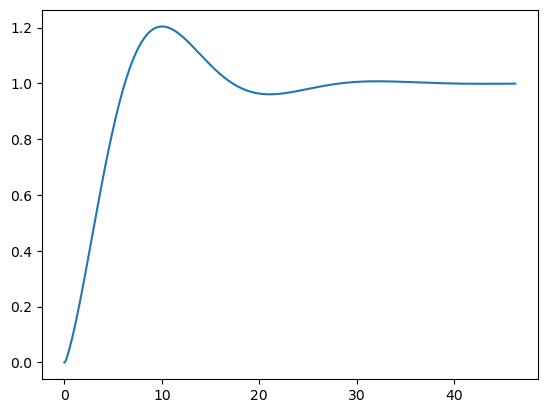

In [75]:
H = ct.tf([1,1],[1,10,3,1])
print(H.zeros())
print(H.poles())
s = ct.step_info(H)
r = ct.step_response(H)
r.y[0][0]
plt.plot(r.t,r.y[0][0])

import pandas as pd
datos = {'t':r.t,'y':r.y[0][0] }
df = pd.DataFrame(datos)
df.to_excel("datos.xlsx",index=False)

In [76]:
s

{'RiseTime': 4.542606528670085,
 'SettlingTime': 24.99145598061442,
 'SettlingMin': 0.9002953270820759,
 'SettlingMax': 1.2038789539396555,
 'Overshoot': 20.38789539396555,
 'Undershoot': 0,
 'Peak': 1.2038789539396555,
 'PeakTime': 10.025062683961567,
 'SteadyStateValue': 1.0}

In [72]:
# hipotesis
# existe un A, B y C que me de la misma grafica la orginal
# donde G(s)= A/(s**2+Bs+C)

def fo(x):
    A = x[0]
    B = x[1]
    C = x[2]
    G = ct.tf(A,[1,B,C])
    df=pd.read_excel("datos.xlsx",sheet_name="Sheet1")
    datos=df.to_numpy()
    res = ct.step_response(G,datos[:,0])
    emc = sum((datos[:,1]-res.y[0][0])**2)/len(res.t)
    return emc
def restriccion(x):
    res = [0,0,0]
    A = x[0]
    B = x[1]
    C = x[2]
    G = ct.tf(A,[1,B,C])
    stepinfo = ct.step_info(G)
    res[0] = stepinfo['RiseTime']
    res[1] = stepinfo['PeakTime']
    res[2] = stepinfo['Overshoot']
    return res  


In [79]:
nlc = NonlinearConstraint(restriccion,[4.5,9.5,19],[4.6,10.5,21])
minimize(fo,[5.6,97,3.3],constraints=nlc)

 message: Iteration limit reached
 success: False
  status: 9
     fun: 0.00863194181257769
       x: [ 3.305e+01  9.699e+01  3.209e+01]
     nit: 100
     jac: [ 1.123e-07 -4.409e-06  1.442e-05]
    nfev: 1112
    njev: 100

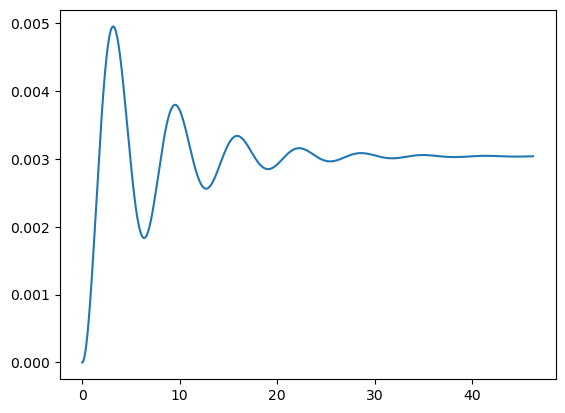

In [86]:
df=pd.read_excel("datos.xlsx",sheet_name="Sheet1")
df['t'].iloc[-1]
datos=df.to_numpy()
datos[:,0]
G = ct.tf(1,[330,96,329])
res=ct.step_response(G,datos[:,0])
res.t
res.y[0][0]
plt.plot(res.t,res.y[0][0])


    

In [68]:
fo([1,3,1])

0.00805247712248884